In [8]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score

In [9]:
data = pd.read_csv('../data/data_msg_only.csv')
x = data.drop(columns=['label'])
y = data['label']

In [3]:
def display_importances(imp, names):
    imp, names = zip(*sorted(zip(imp, names)))
    plt.barh(range(len(names)), imp)
    plt.yticks(range(len(names)), names)
    plt.show()

In [10]:
features_names = ['characters_count', 'and_or',  'blank_line', 'capital_start', 'end_dot', 'imperative_start', 'wrap_to_72',
                  'verb_obj_conn']

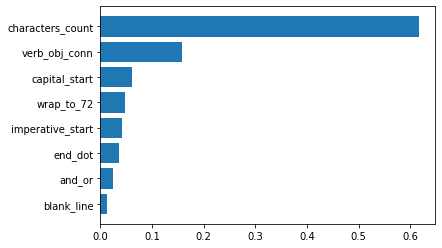

In [7]:
clf = DecisionTreeClassifier()
clf.fit(x, y)
display_importances(clf.feature_importances_, features_names)

---

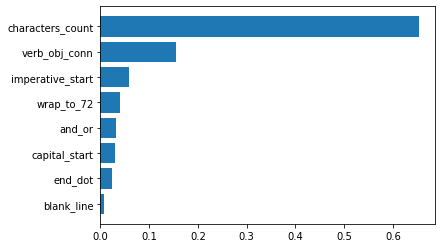

In [6]:
clf = RandomForestClassifier()
clf.fit(x, y)
display_importances(clf.feature_importances_, features_names)

---

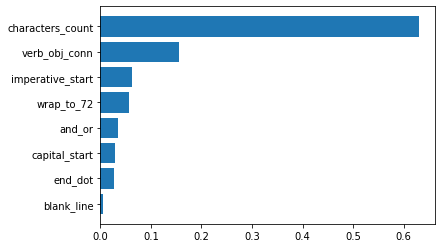

In [7]:
clf = ExtraTreesClassifier()
clf.fit(x, y)
display_importances(clf.feature_importances_, features_names)

---

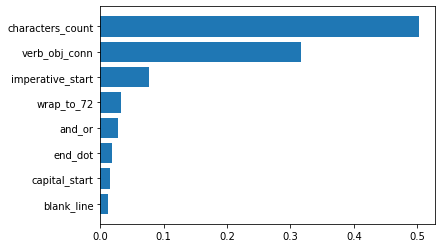

In [8]:
clf = GradientBoostingClassifier()
clf.fit(x, y)
display_importances(clf.feature_importances_, features_names)

---

DecisionTreeClassifier(whole commit): [highest 0.78] [accuracy 0.71] [time 0.56]

DecisionTreeClassifier(message only): [highest 0.72] [accuracy 0.61] [time 0.4]

---

RandomForestClassifier(whole commit): [highest 0.86] [accuracy 0.77] [time 15.11]

RandomForestClassifier(message only): [highest 0.68] [accuracy 0.62] [time 13.4]

---

ExtraTreesClassifier(whole commit): [highest 0.8] [accuracy 0.74] [time 13.71]

ExtraTreesClassifier(message only): [highest 0.68] [accuracy 0.61] [time 11.48]

---

GradientBoostingClassifier(whole commit): [highest 0.84] [accuracy 0.77] [time 38.41]

GradientBoostingClassifier(message only): [highest 0.78] [accuracy 0.67] [time 23.82]


In [13]:
data_good = data[data.label == 'good']
data_neutral = data[data.label == 'neutral']
data_bad = data[data.label == 'bad']

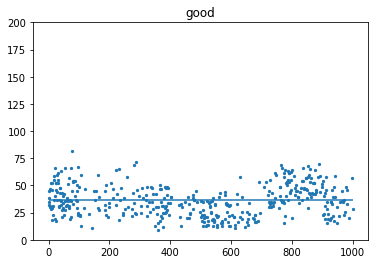

Standard Deviation: 14.380238574228406


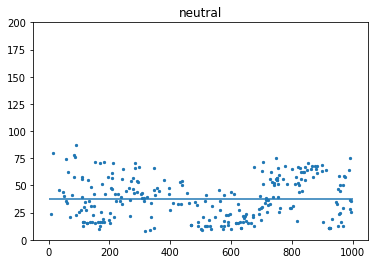

Standard Deviation: 19.4074250912781


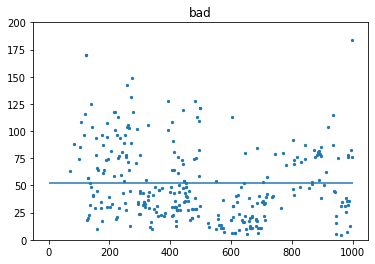

Standard Deviation: 36.331449857398525


In [85]:
plt.ylim(0,200)
plt.title("good")
plt.scatter(x=data_good.index, y=data_good['characters_count'], s=5); 
plt.hlines(y=data_good['characters_count'].mean(), xmin=0, xmax=1000) # Mean line
plt.show()
print('Standard Deviation:', data_good['characters_count'].std())

plt.title("neutral")
plt.ylim(0,200)
plt.scatter(x=data_neutral.index, y=data_neutral['characters_count'], s=5);
plt.hlines(y=data_neutral['characters_count'].mean(), xmin=0, xmax=1000);
plt.show()
print('Standard Deviation:', data_neutral['characters_count'].std())

plt.title("bad")
plt.ylim(0,200)
plt.scatter(x=data_bad.index, y=data_bad['characters_count'], s=5);
plt.hlines(y=data_bad['characters_count'].mean(), xmin=0, xmax=1000);
plt.show()
print('Standard Deviation:', data_bad['characters_count'].std())

In [11]:
def drow_histogram(x, bins, title):
    plt.hist(x,bins)
    plt.xlabel('Chrarcters Count')
    plt.ylabel('Number of Commits')
    plt.xticks(np.arange(start=0, stop=300, step=30))
    plt.axvline(x.mean(), color='r', label='Mean')
    plt.legend()

    plt.title(title)
    plt.tight_layout()
    plt.show()
    
    
def drow_histogram_2(x, title):
    plt.xlabel('Pattern met')
    plt.ylabel('Number of Commits')
    plt.axvline(x.mean(), color='r', label='mean')
    plt.legend()

    labels, counts = np.unique(np.array(x), return_counts=True)
    plt.title(title)

    plt.bar(labels, counts, align='center')
    plt.gca().set_xticks([0, 0.5, 1])

    plt.tight_layout()
    plt.show()

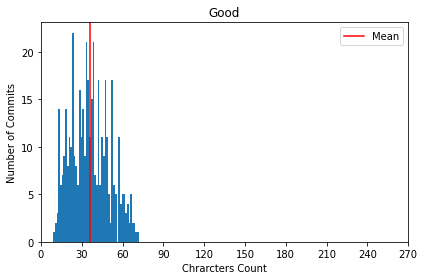

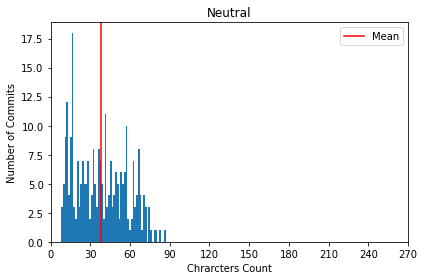

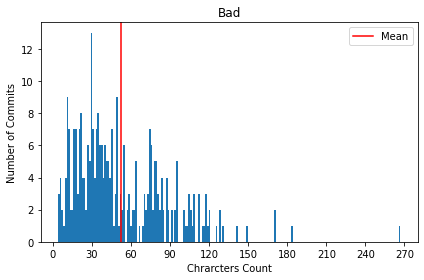

In [17]:
x1 = data_good['characters_count']
x2 = data_neutral['characters_count']
x3 = data_bad['characters_count']

drow_histogram(x1, 50, 'Good')
drow_histogram(x2, 60, 'Neutral')
drow_histogram(x3, 200, 'Bad')

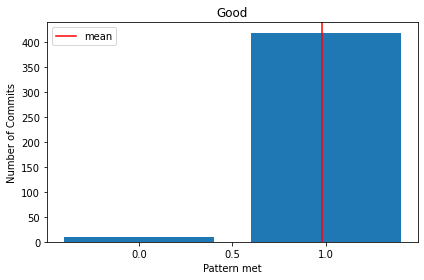

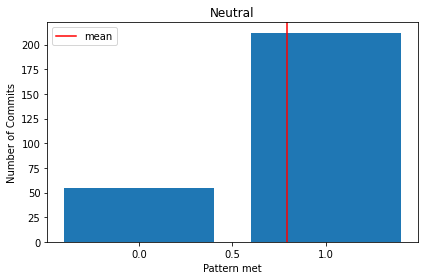

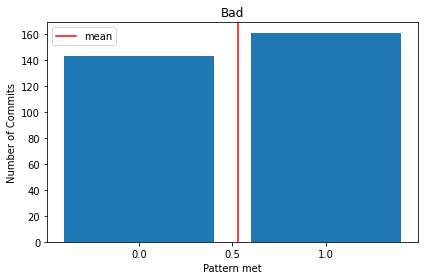

In [14]:
x1 = data_good['verb_obj_conn']
x2 = data_neutral['verb_obj_conn']
x3 = data_bad['verb_obj_conn']

drow_histogram_2(x1, 'Good')
drow_histogram_2(x2, 'Neutral')
drow_histogram_2(x3, 'Bad')